In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('facebook.csv')

## Проведем разведывательный анализ данных, посмотрим на типы данных, на пропуски. Узнаем, что описывают данные.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [4]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [5]:
df.shape

(7050, 12)

### По итогу видим, что данные представляют собой в основном целочисленные и строковые типы данных, также видно, что столбец с данными о дате публикации считался как тип object. Для дальнейшей работы следует поменять тип данных на datetime. В датафрейме 7050 строк и 12 столбцов. Сам датафрейм описывает данные о статусах в социальной сети Facebook, в данных описывается уникальный номер поста, лайки, репосты и комментарии, а также общее количество реакций пользователей, дата публикации, а также количество реакций в разрез по каждой реакции(любовь, удивление, смешно, грусть, злость).


In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
df['status_published'] = pd.to_datetime(df.status_published)

# Посмотрим на тенденции в реакциях пользователей на статусы в социальной сети

### Какие типы реакций наиболее распространены среди пользователей? Есть ли какие-то особенности в распределении реакций в зависимости от типа поста или дня публикации?

In [8]:
top_reactions = df[['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum().reset_index()
top_reactions = top_reactions.rename(columns=({'index':'reaction', 0:'sum'}))

<Axes: xlabel='reaction', ylabel='sum'>

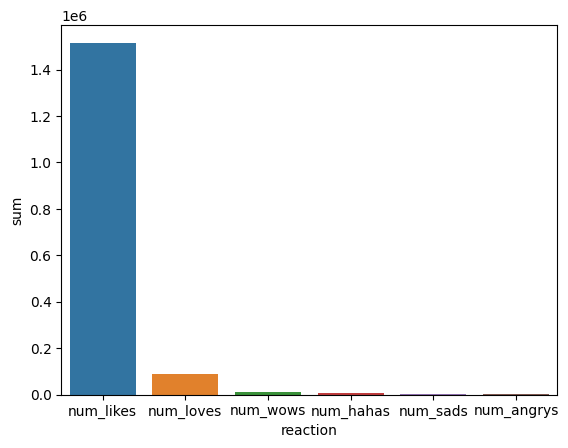

In [9]:
sns.barplot(top_reactions, x="reaction", y="sum", hue="reaction", )

<Axes: xlabel='status_type', ylabel='num_reactions'>

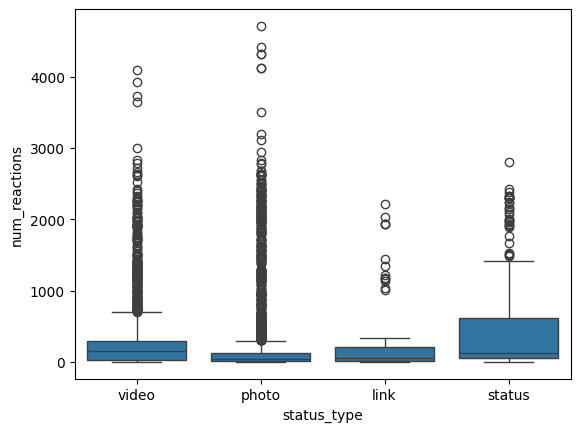

In [18]:
sns.boxplot(data=df, x='status_type', y='num_reactions')

In [21]:
df['day'] = df.status_published.dt.weekday

<Axes: xlabel='day', ylabel='num_reactions'>

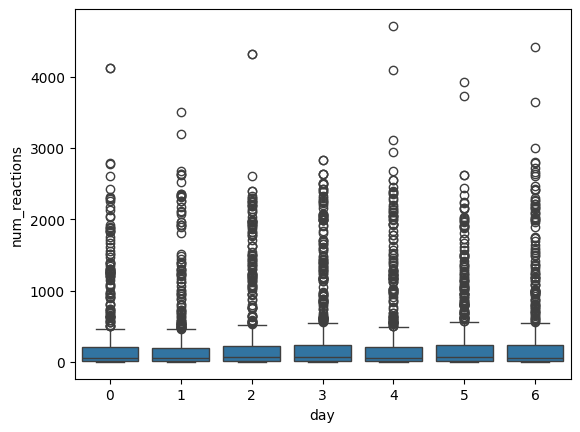

In [24]:
sns.boxplot(data=df, x='day', y='num_reactions')

### Смотря на графики видно, что распределение числа реакций по дням приблизительно равное, все дни имеют выбросы, чего не сказать про распределение количества реакций по типу поста, видно, что распределения реакций с постами типа: видео и статус имеют большее распределение, чем другие типы. Лайки являются самой популярной РЕАКЦИЕЙ.

# Предлагаю подумать насчёт взаимосвязи параметров. Проверим число реакций, репостов и комментариев, посмотрим на их корреляцию, узнаем существует ли она или нет. Также считаю нужным проверить какие типы постов получают обычно(в среднем) больше всего реакций, комментариев и репостов

In [30]:
df[['num_reactions', 'num_comments', 'num_shares']].corr()

,num_reactions,num_comments,num_shares
num_reactions,1.000000,0.150843,0.250723
num_comments,0.150843,1.000000,0.640637
num_shares,0.250723,0.640637,1.000000


### Посмотрев на матрицу корреляций, можно сделать вывод о том, что средней корреляцией обладает только одна пара - это комментарии и репосты, остальные же пары имеют слабую корреляцию.

In [31]:
df.groupby('status_type', as_index=False).agg({'num_reactions':'mean', 'num_shares':'mean', 'num_comments':'mean'})

,status_type,num_reactions,num_shares,num_comments
0,link,370.142857,4.396825,5.698413
1,photo,181.290345,2.553871,15.993470
2,status,438.783562,2.558904,36.238356
3,video,283.409597,115.679949,642.478149


### Если посмотреть на результат и сравнивать все параметры, то можно сделать вывод о том, что пользователи лучше всего взаимодействуют с постами со статусом видео, количество репостов и комментариев во много раз больше чисел в других типах постов, НО возможно это результаты так называемых выбросов это стоит проверить. 

In [43]:
video = df.query('status_type == "video"')[['status_type', 'num_comments', 'num_shares']]

<Axes: xlabel='status_type', ylabel='num_comments'>

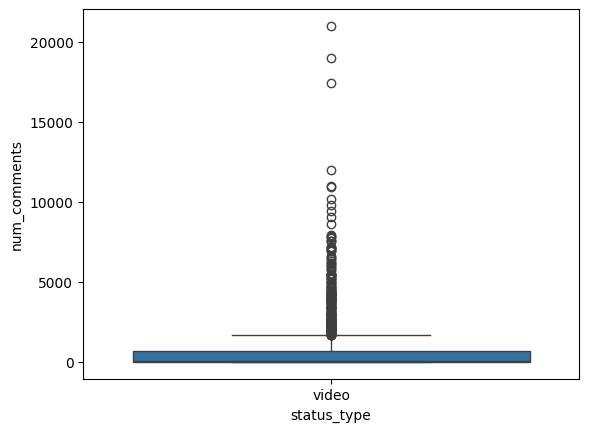

In [46]:
sns.boxplot(data=video, x='status_type', y='num_comments')



<Axes: xlabel='status_type', ylabel='num_shares'>

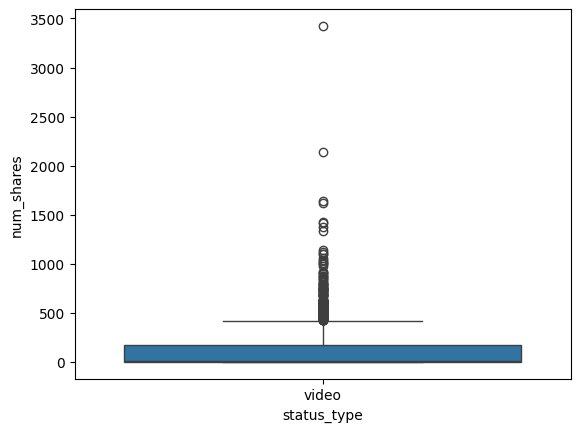

In [47]:
sns.boxplot(data=video, x='status_type', y='num_shares')

### Ознакомившись с графиками можно предположить о том, чем обусловлены числа, полученные выше. Видео могли быть вирусными, которые взорвали интернет, может это были посты связанные с выступлением очень известного человека, обычно под видео собирается очень много людей, которые делятся своим мнением, теперь становится ясно, каким образом обусловлены выбросы.

# Динамика активности: 
Как меняется с течением времени количество реакций/комментариев/репосто ?
Существует ли сезонность или тренды в активности публикаций?

In [49]:
df['month_year'] = df['status_published'].dt.to_period('M')

In [68]:
r_s_c = df[['month_year', 'num_reactions', 'num_shares', 'num_comments']].sort_values(by='month_year')      

<Axes: xlabel='month_year', ylabel='num_reactions'>

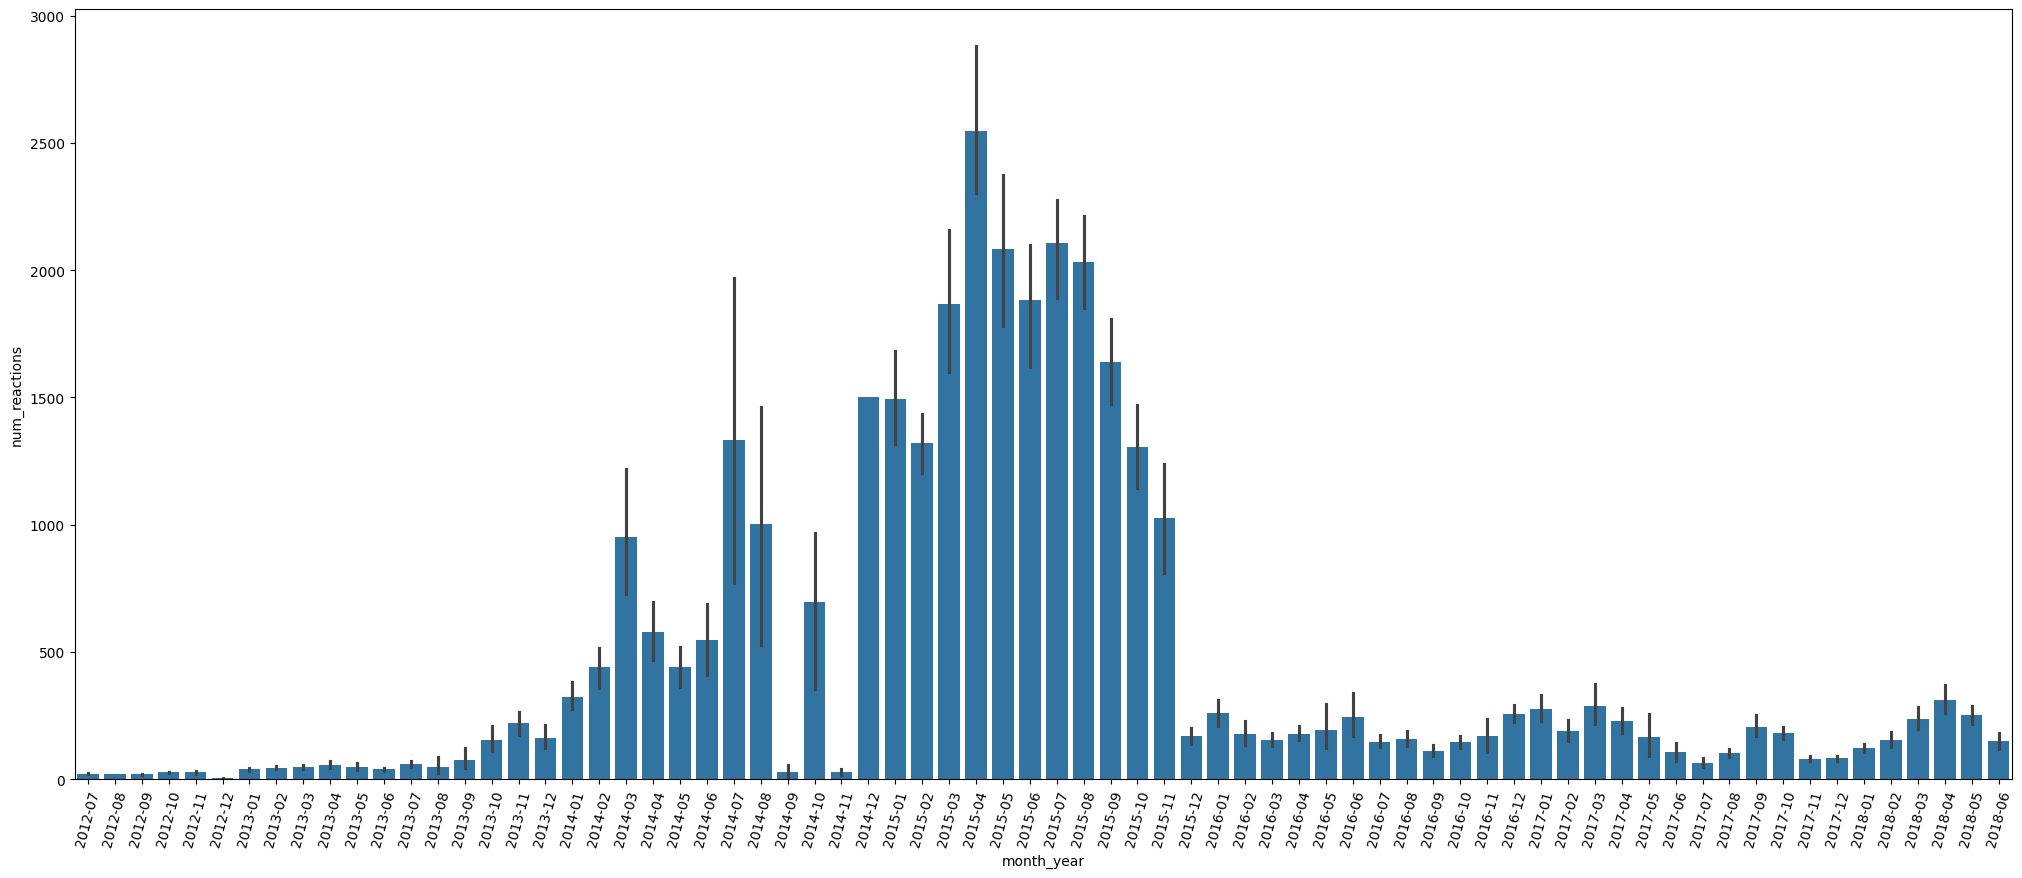

In [78]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=75) 
sns.barplot(data=r_s_c, x='month_year', y='num_reactions')



<Axes: xlabel='month_year', ylabel='num_shares'>

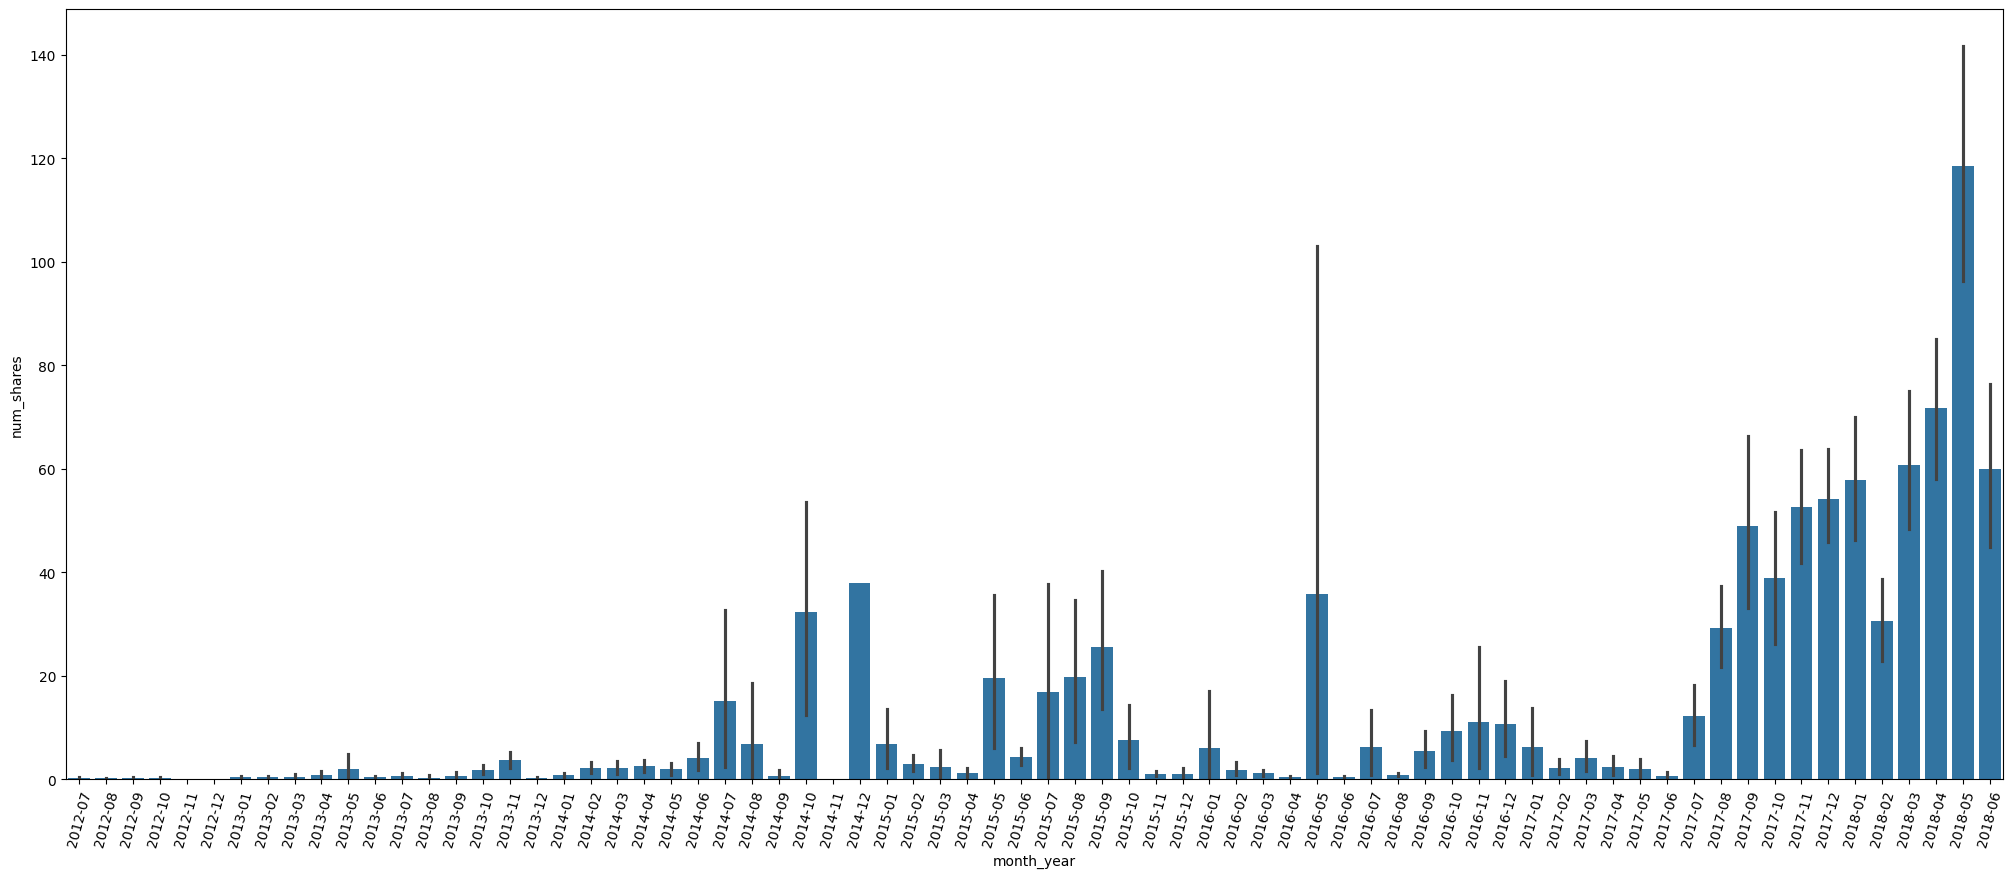

In [81]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=75) 
sns.barplot(data=r_s_c, x='month_year', y='num_shares')


<Axes: xlabel='month_year', ylabel='num_comments'>

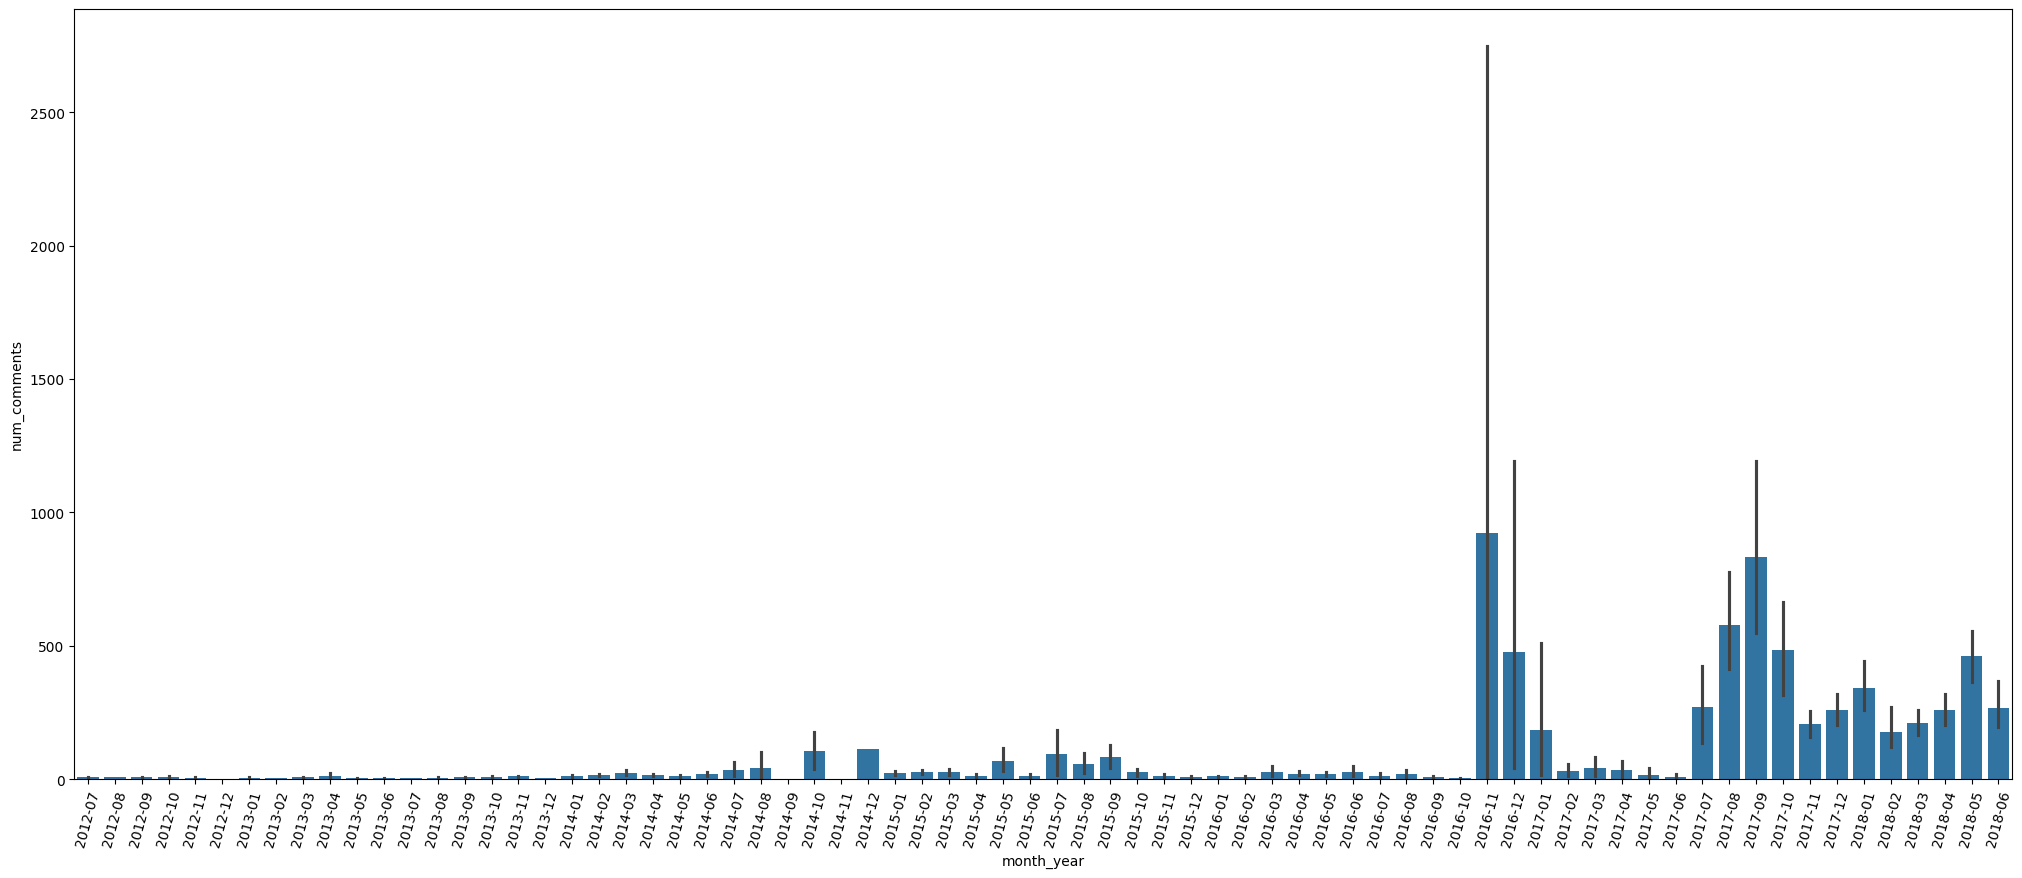

In [82]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=75) 
sns.barplot(data=r_s_c, x='month_year', y='num_comments')

### Посмотрев на диаграммы, можно сделать вывод, что 2015 год был лучшим по активности пользователей(реакции) для представленных данных. Пик активности пользователей пришёлся на апрель 2015 года, отдалённо похожая ситуация наблюдалась и в 2014 году, однако, нельзя сделать вывод о том, что это объясняется сезонностью или же каким-либо трендом. Также видно, что комментарии и репосты начали активно проявлять интерес у пользователей начиная с 2017 года, хотя репосты в некоторые месяцы прошлых лет сталкивались с серьёзными выбросами, можно предположить, что это было спровоцировано какими-то событиями в то время

## Также можно посмотреть на средние значения для каждого типа поста на протяжении каждого года, попробовать оценить эффективность постов в каждый год, который представлен в данных.

In [94]:
time = df[['status_published','status_type', 'num_reactions', 'num_shares', 'num_comments']].set_index('status_published')

In [98]:
time.groupby([pd.Grouper(freq='Y'), 'status_type']). \
agg(mean_comments=('num_comments', 'mean'), mean_reactions=('num_reactions', 'sum'), mean_shares=('num_shares', 'mean'))


mean_comments  mean_reactions  mean_shares
status_published status_type                                            
2012-12-31       photo             6.881154           12389     0.186757
2013-12-31       photo             5.019802           23015     0.475248
                 status           21.000000              71     7.500000
                 video            10.085106           22438     3.255319
2014-12-31       link              0.000000              37     0.000000
                 photo             3.640000            3480     1.120000
                 video            21.893720          138114     3.927536
2015-12-31       link             14.214286           20749     3.785714
                 photo            37.108911          316681     8.014851
                 status           31.113924          103192     5.607595
                 video            28.714286           78417    19.547619
2016-12-31       link              3.285714             925     5.214286
                 photo             7.558313           79975     7.344913
                 status            8.156863            4925     2.470588
                 video           479.641667           19395     7.883333
2017-12-31       link              4.222222            1223     4.777778
                 photo            25.386919          123125     1.851852
                 status           29.631148           12008     0.934426
                 video           824.184834          122924   104.553318
2018-12-31       link              2.375000             385     4.062500
                 photo            14.075931          218708     2.644699
                 status           60.324324           39960     2.126126
                 video           720.242454          280190   174.165531

### Посмотрев на результат, можно сделать вывод о том, что в 2012 году единственным типом постов в социальной сети был тип фото, в дальнейшем были реализованы остальные три типа публикаций. Видно, что на протяжении всего времени посты с типом link стабильно занимают последнее место в реакциях пользователей, из этого следует, что компании нужно уделить больше времени функционалу данного типа постов или вовсе от него избавиться. Основываясь на данных, можно сделать вывод о том, что посты типа video и photo из года в год увеличивают свою популярность среди пользователей. 

### Общий вывод### 
В ходе разведывательного анализа данных о статусах в социальной сети было обнаружено несколько ключевых закономерностей, которые могут помочь лучше понять предпочтения пользователей и оптимизировать стратегии контентного взаимодействия. Во-первых, выявлено, что контент в формате видео и фотографий привлекает наибольшее количество реакций со стороны пользователей, особенно лайков. Это указывает на значимость визуального контента для привлечения внимания аудитории. Также отмечается рост интереса к комментариям и репостам со временем, что может свидетельствовать о растущем вовлечении пользователей в обсуждение контента и его дальнейшее распространение. Во-вторых, анализ временных трендов позволяет выделить 2015 год как период наибольшей активности пользователей. Это может быть связано с определенными событиями или трендами в это время, что представляет интерес для дальнейшего исследования. Кроме того, стоит обратить внимание на менее популярные типы контента, такие как ссылочные посты. Их низкая привлекательность для пользователей может указывать на необходимость пересмотра функционала фичи.
нтентом.